# **Machine learning model for prediction of smartphone addiction**

# **Import Statements**

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# **read The Dataset**

In [6]:
# read The csv file
df = pd.read_csv("20230329093832Mobile-Addiction-.csv")

In [7]:
# Show The First Five Row
df.head()

,Timestamp,Full Name :,Gender :,Do you use your phone to click pictures of class notes?,Do you buy books/access books from your mobile?,Does your phone's battery last a day?,"When your phone's battery dies out, do you run for the charger?",Do you worry about losing your cell phone?,Do you take your phone to the bathroom?,Do you use your phone in any social gathering (parties)?,...,Do you check your phone just before going to sleep/just after waking up?,Do you keep your phone right next to you while sleeping?,"Do you check emails, missed calls, texts during class time?",Do you find yourself relying on your phone when things get awkward?,Are you on your phone while watching TV or eating food?,Do you have a panic attack if you leave your phone elsewhere?,You don't mind responding to messages or checking your phone while on date?,For how long do you use your phone for playing games?,Can you live a day without phone ?,whether you are addicted to phone?
0,2023/02/17 2:21:53 PM GMT+5:30,Dabbeta Ganesh Kumar,MALE,Yes,Yes,Yes,Yes;No,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,<2 hours,NaN,NaN
1,2023/02/24 4:28:34 PM GMT+5:30,Mir Junaid Rasool,MALE,Yes,No,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,<2 hours,No,Maybe
2,2023/02/24 4:34:02 PM GMT+5:30,Dev,MALE,Yes,No,No,Yes,Yes,Yes,Yes,...,Yes,Yes,No,Yes,Yes,Yes,Yes,>2 hours,No,Yes
3,2023/02/27 3:32:22 PM GMT+5:30,A.RuthvikDev,MALE,Yes,No,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,Yes,No,Yes,No,<2 hours,Yes,No
4,2023/02/27 3:33:44 PM GMT+5:30,Vishnu,MALE,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,NaN,No,No,No,No,No,<2 hours,Yes,No


In [8]:
# Show The Last Five Row
df.tail()

,Timestamp,Full Name :,Gender :,Do you use your phone to click pictures of class notes?,Do you buy books/access books from your mobile?,Does your phone's battery last a day?,"When your phone's battery dies out, do you run for the charger?",Do you worry about losing your cell phone?,Do you take your phone to the bathroom?,Do you use your phone in any social gathering (parties)?,...,Do you check your phone just before going to sleep/just after waking up?,Do you keep your phone right next to you while sleeping?,"Do you check emails, missed calls, texts during class time?",Do you find yourself relying on your phone when things get awkward?,Are you on your phone while watching TV or eating food?,Do you have a panic attack if you leave your phone elsewhere?,You don't mind responding to messages or checking your phone while on date?,For how long do you use your phone for playing games?,Can you live a day without phone ?,whether you are addicted to phone?
496,2023/03/28 2:36:46 PM GMT+5:30,Sahadev,MALE,No,No,No,Yes,No,No,No,...,Yes,Yes,No,No,Yes,Yes,No,<2 hours,Yes,No
497,2023/03/28 2:37:54 PM GMT+5:30,Chandra,MALE,Yes,No,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,>2 hours,Yes,No
498,2023/03/28 2:38:26 PM GMT+5:30,Laxman,MALE,No,No,Yes,Yes,Yes,No,Yes,...,No,No,Yes,No,Yes,No,Yes,>2 hours,Yes,Yes
499,2023/03/28 2:39:19 PM GMT+5:30,Sheri mohan,MALE,Yes,Yes,No,Yes,No,Yes,Yes,...,Yes,Yes,No,Yes,Yes,No,Yes,>2 hours,Yes,No
500,2023/03/28 2:39:59 PM GMT+5:30,Puri jaganath,MALE,Yes,Yes,No,Yes,Yes,Yes,Yes,...,NaN,NaN,Yes,Yes,Yes,Yes,Yes,>2 hours,No,Yes


# **Informationn about Dataset**

In [9]:
# check The Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 21 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   Timestamp                                                                     501 non-null    object
 1   Full Name :                                                                   496 non-null    object
 2   Gender :                                                                      500 non-null    object
 3   Do you use your phone to click pictures of class notes?                       499 non-null    object
 4   Do you buy books/access books from your mobile?                               499 non-null    object
 5   Does your phone's battery last a day?                                         498 non-null    object
 6   When your phone's battery dies out, do you

In [10]:
# shape of The Dataset
df.shape

(501, 21)

In [11]:
# Check The Null Values
df.isnull().sum()

Timestamp                                                                       0
Full Name :                                                                     5
Gender :                                                                        1
Do you use your phone to click pictures of class notes?                         2
Do you buy books/access books from your mobile?                                 2
Does your phone's battery last a day?                                           3
When your phone's battery dies out, do you run for the charger?                 3
Do you worry about losing your cell phone?                                      1
Do you take your phone to the bathroom?                                         2
Do you use your phone in any social gathering (parties)?                        1
Do you often check your phone without any notification?                         1
Do you check your phone just before going to sleep/just after waking up?        2
Do you keep your

In [12]:

# Check The Duplicate Vlue
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
496    False
497    False
498    False
499    False
500    False
Length: 501, dtype: bool

In [13]:
# Describe The Dataset
df.describe()

,Timestamp,Full Name :,Gender :,Do you use your phone to click pictures of class notes?,Do you buy books/access books from your mobile?,Does your phone's battery last a day?,"When your phone's battery dies out, do you run for the charger?",Do you worry about losing your cell phone?,Do you take your phone to the bathroom?,Do you use your phone in any social gathering (parties)?,...,Do you check your phone just before going to sleep/just after waking up?,Do you keep your phone right next to you while sleeping?,"Do you check emails, missed calls, texts during class time?",Do you find yourself relying on your phone when things get awkward?,Are you on your phone while watching TV or eating food?,Do you have a panic attack if you leave your phone elsewhere?,You don't mind responding to messages or checking your phone while on date?,For how long do you use your phone for playing games?,Can you live a day without phone ?,whether you are addicted to phone?
count,501,496,500,499,499,498,498,500,499,500,...,499,498,498,497,500,500,496,497,499,499
unique,308,271,3,2,2,2,3,2,2,2,...,2,2,2,2,2,2,2,2,2,3
top,2023/03/10 3:29:09 PM GMT+5:30,pawan,MALE,Yes,No,Yes,Yes,No,Yes,No,...,No,No,No,Yes,No,No,Yes,>2 hours,Yes,No
freq,19,20,417,441,318,406,417,285,367,303,...,294,310,340,411,319,308,394,331,413,322


In [14]:
# total null valus in Dataset
df.isnull().sum().sum()

48

In [15]:
df.columns

Index(['Timestamp', 'Full Name :', 'Gender :',
       'Do you use your phone to click pictures of class notes?',
       'Do you buy books/access books from your mobile?',
       'Does your phone's battery last a day?',
       'When your phone's battery dies out, do you run for the charger?',
       'Do you worry about losing your cell phone?',
       'Do you take your phone to the bathroom?',
       'Do you use your phone in any social gathering (parties)?',
       'Do you often check your phone without any notification? ',
       'Do you check your phone just before going to sleep/just after waking up?',
       'Do you keep your phone right next to you while sleeping?',
       'Do you check emails, missed calls, texts during class time? ',
       'Do you find yourself relying on your phone when things get awkward?',
       'Are you on your phone while watching TV or eating food?',
       'Do you have a panic attack if you leave your phone elsewhere?',
       'You don't mind responding

In [16]:
df['whether you are addicted to phone?'].value_counts()

whether you are addicted to phone?
No       322
Yes      176
Maybe      1
Name: count, dtype: int64

# **Preprocessing**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 21 columns):
 #   Column                                                                        Non-Null Count  Dtype 
---  ------                                                                        --------------  ----- 
 0   Timestamp                                                                     501 non-null    object
 1   Full Name :                                                                   496 non-null    object
 2   Gender :                                                                      500 non-null    object
 3   Do you use your phone to click pictures of class notes?                       499 non-null    object
 4   Do you buy books/access books from your mobile?                               499 non-null    object
 5   Does your phone's battery last a day?                                         498 non-null    object
 6   When your phone's battery dies out, do you

In [18]:
# **fill a Null Values**
col = df[['Timestamp', 'Full Name :', 'Gender :',
       'Do you use your phone to click pictures of class notes?',
       'Do you buy books/access books from your mobile?',
       "Does your phone's battery last a day?",
       "When your phone's battery dies out, do you run for the charger?",
       'Do you worry about losing your cell phone?',
       'Do you take your phone to the bathroom?',
       'Do you use your phone in any social gathering (parties)?',
       'Do you often check your phone without any notification? ',
       'Do you check your phone just before going to sleep/just after waking up?',
       'Do you keep your phone right next to you while sleeping?',
       'Do you check emails, missed calls, texts during class time? ',
       'Do you find yourself relying on your phone when things get awkward?',
       'Are you on your phone while watching TV or eating food?',
       'Do you have a panic attack if you leave your phone elsewhere?',
       "You don't mind responding to messages or checking your phone while on date? ",
       'For how long do you use your phone for playing games?',
       'Can you live a day without phone ? ',
       'whether you are addicted to phone?']]

In [19]:
# filling a null Values applying a ffill method
for i in col:
    df[i].fillna(method='ffill',inplace=True)

C:\Users\chinm\AppData\Local\Temp\ipykernel_5556\32333529.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(method='ffill',inplace=True)
C:\Users\chinm\AppData\Local\Temp\ipykernel_5556\32333529.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[i].fillna(method='ffill',inplace=True)


In [20]:
df['Can you live a day without phone ? '].fillna(method='bfill',inplace=True)
df['whether you are addicted to phone?'].fillna(method='bfill',inplace=True)

C:\Users\chinm\AppData\Local\Temp\ipykernel_5556\3450501767.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Can you live a day without phone ? '].fillna(method='bfill',inplace=True)
C:\Users\chinm\AppData\Local\Temp\ipykernel_5556\3450501767.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['whether you are addicted to phone?'].fillna(method='bfill',inplace=True)


In [21]:
df.isnull().sum()

Timestamp                                                                       0
Full Name :                                                                     0
Gender :                                                                        0
Do you use your phone to click pictures of class notes?                         0
Do you buy books/access books from your mobile?                                 0
Does your phone's battery last a day?                                           0
When your phone's battery dies out, do you run for the charger?                 0
Do you worry about losing your cell phone?                                      0
Do you take your phone to the bathroom?                                         0
Do you use your phone in any social gathering (parties)?                        0
Do you often check your phone without any notification?                         0
Do you check your phone just before going to sleep/just after waking up?        0
Do you keep your

In [22]:
# before Label Encoding
df.head()

,Timestamp,Full Name :,Gender :,Do you use your phone to click pictures of class notes?,Do you buy books/access books from your mobile?,Does your phone's battery last a day?,"When your phone's battery dies out, do you run for the charger?",Do you worry about losing your cell phone?,Do you take your phone to the bathroom?,Do you use your phone in any social gathering (parties)?,...,Do you check your phone just before going to sleep/just after waking up?,Do you keep your phone right next to you while sleeping?,"Do you check emails, missed calls, texts during class time?",Do you find yourself relying on your phone when things get awkward?,Are you on your phone while watching TV or eating food?,Do you have a panic attack if you leave your phone elsewhere?,You don't mind responding to messages or checking your phone while on date?,For how long do you use your phone for playing games?,Can you live a day without phone ?,whether you are addicted to phone?
0,2023/02/17 2:21:53 PM GMT+5:30,Dabbeta Ganesh Kumar,MALE,Yes,Yes,Yes,Yes;No,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,<2 hours,No,Maybe
1,2023/02/24 4:28:34 PM GMT+5:30,Mir Junaid Rasool,MALE,Yes,No,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,<2 hours,No,Maybe
2,2023/02/24 4:34:02 PM GMT+5:30,Dev,MALE,Yes,No,No,Yes,Yes,Yes,Yes,...,Yes,Yes,No,Yes,Yes,Yes,Yes,>2 hours,No,Yes
3,2023/02/27 3:32:22 PM GMT+5:30,A.RuthvikDev,MALE,Yes,No,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,Yes,No,Yes,No,<2 hours,Yes,No
4,2023/02/27 3:33:44 PM GMT+5:30,Vishnu,MALE,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,No,No,No,No,No,<2 hours,Yes,No


In [23]:
# Apply The Label Encoding
le = LabelEncoder()

In [24]:
for i in col:
    df[i]=le.fit_transform(df[i])

In [25]:
# After Label Encoding
df.head()

,Timestamp,Full Name :,Gender :,Do you use your phone to click pictures of class notes?,Do you buy books/access books from your mobile?,Does your phone's battery last a day?,"When your phone's battery dies out, do you run for the charger?",Do you worry about losing your cell phone?,Do you take your phone to the bathroom?,Do you use your phone in any social gathering (parties)?,...,Do you check your phone just before going to sleep/just after waking up?,Do you keep your phone right next to you while sleeping?,"Do you check emails, missed calls, texts during class time?",Do you find yourself relying on your phone when things get awkward?,Are you on your phone while watching TV or eating food?,Do you have a panic attack if you leave your phone elsewhere?,You don't mind responding to messages or checking your phone while on date?,For how long do you use your phone for playing games?,Can you live a day without phone ?,whether you are addicted to phone?
0,0,43,1,1,1,1,2,1,1,1,...,1,1,1,1,1,1,1,0,0,0
1,1,110,1,1,0,1,1,1,1,1,...,1,1,0,1,0,1,1,0,0,0
2,2,46,1,1,0,0,1,1,1,1,...,1,1,0,1,1,1,1,1,0,2
3,11,1,1,1,0,1,1,1,0,1,...,1,1,1,1,0,1,0,0,1,1
4,12,250,1,1,1,1,1,1,0,1,...,1,1,0,0,0,0,0,0,1,1


In [26]:
df['whether you are addicted to phone?'].value_counts()

whether you are addicted to phone?
1    322
2    177
0      2
Name: count, dtype: int64

# **EDA**

C:\Users\chinm\AppData\Local\Temp\ipykernel_5556\2907715040.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(17,1))


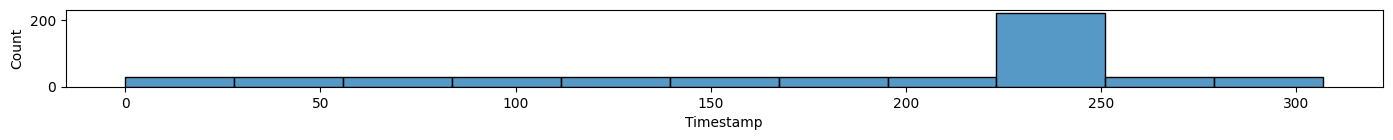

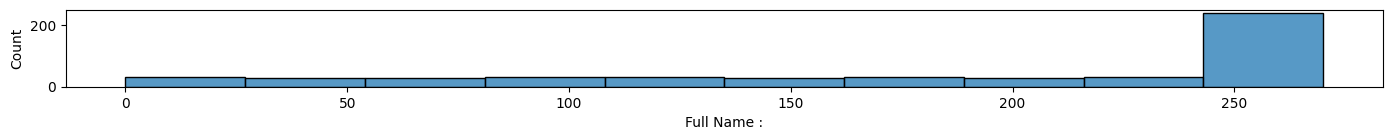

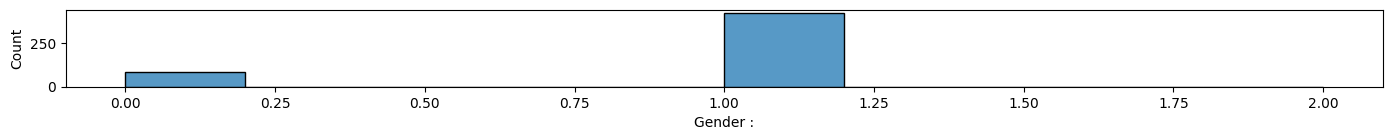

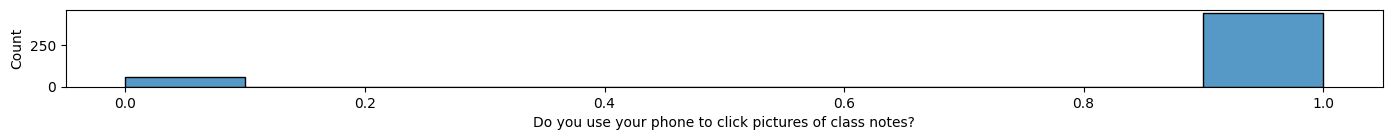

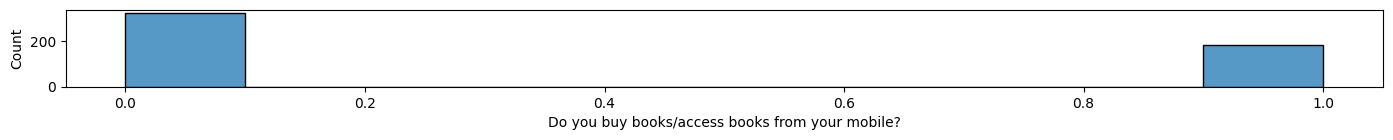

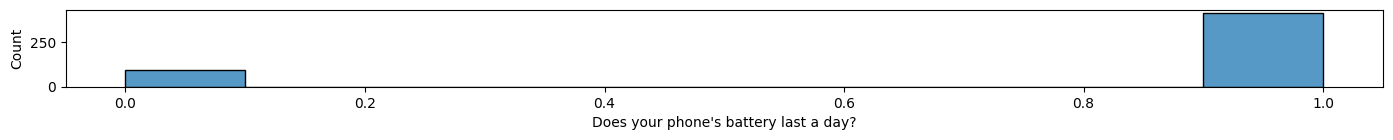

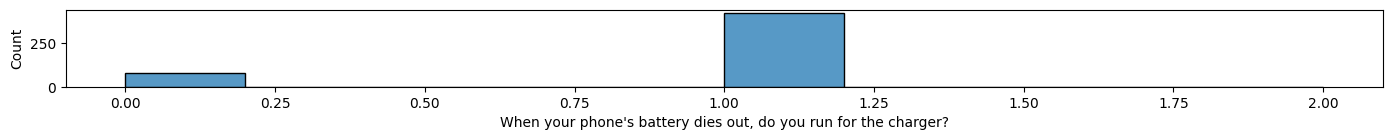

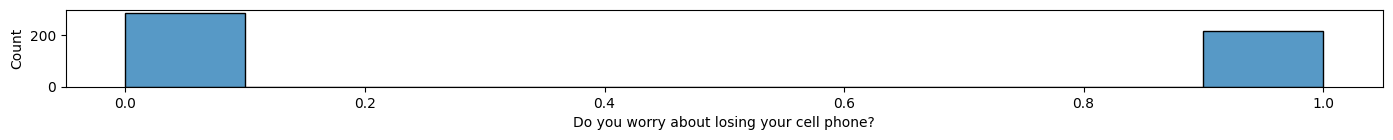

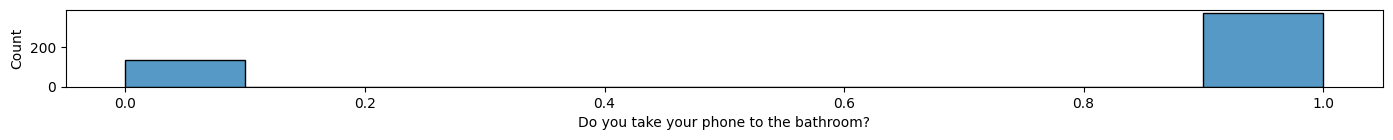

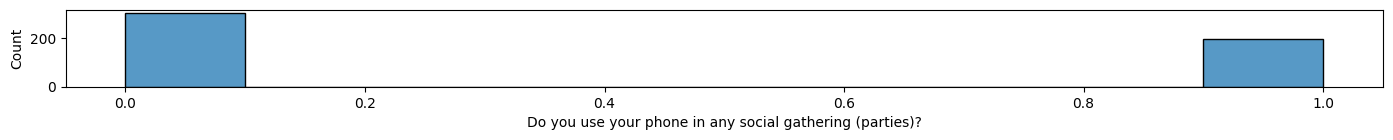

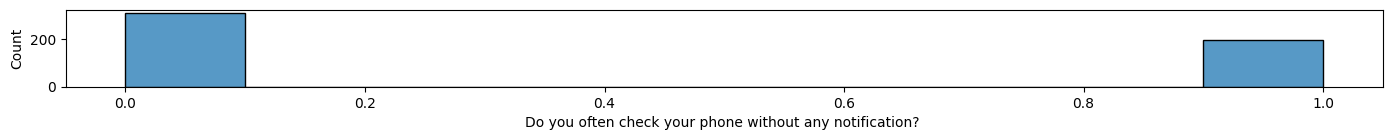

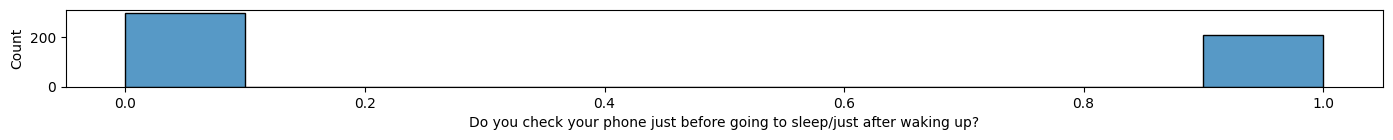

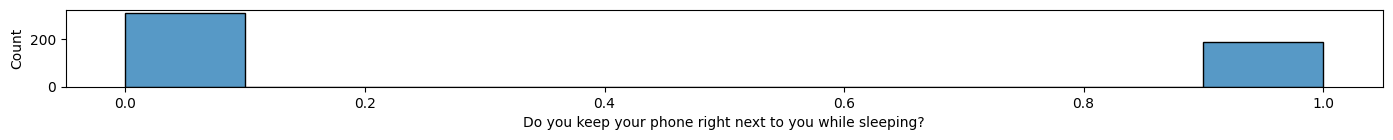

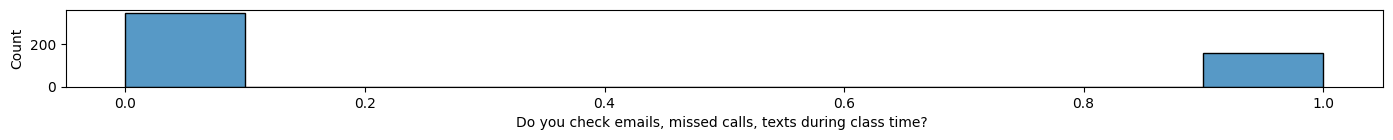

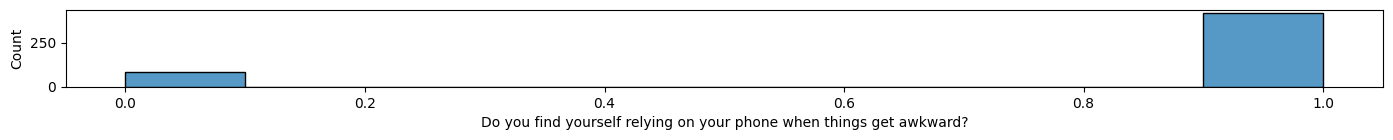

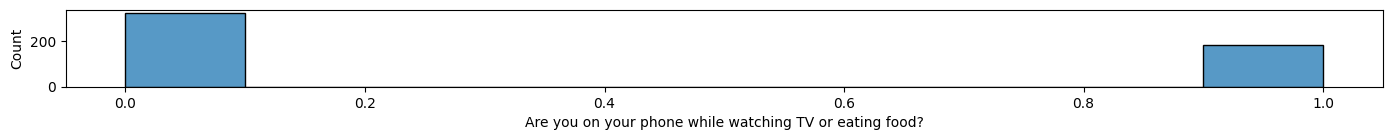

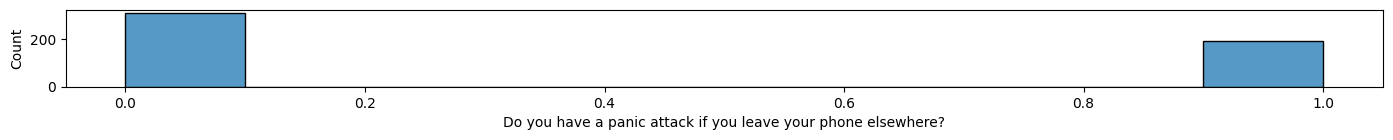

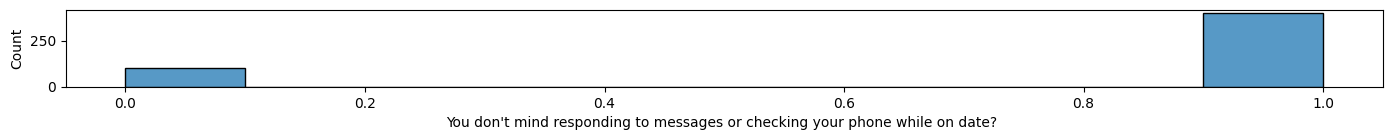

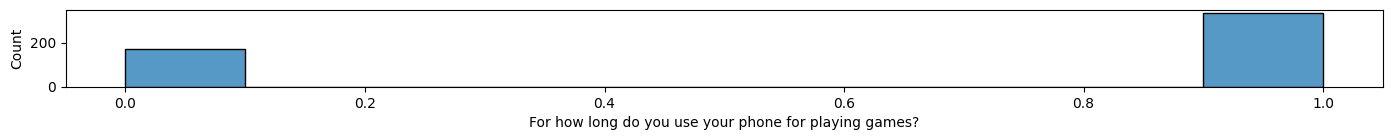

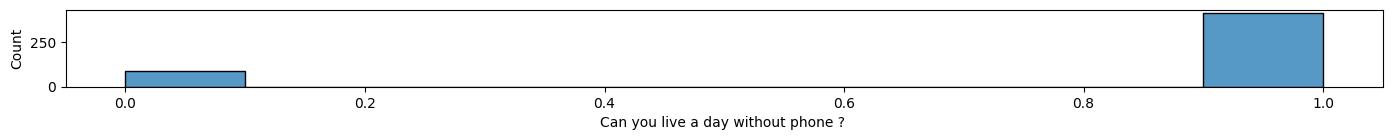

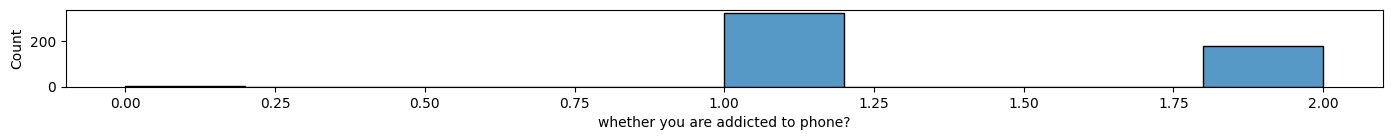

In [27]:
# Histplot of every column in dataset
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.histplot(data=df1, x=column)
plt.show()

C:\Users\chinm\AppData\Local\Temp\ipykernel_5556\1802899625.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(17,1))


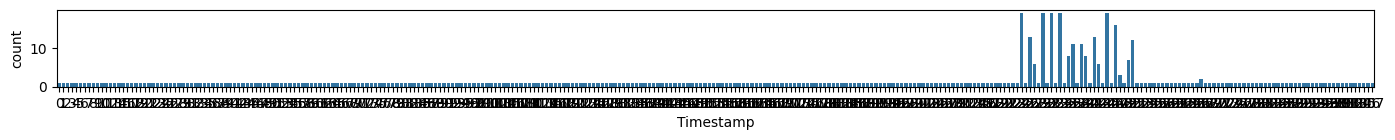

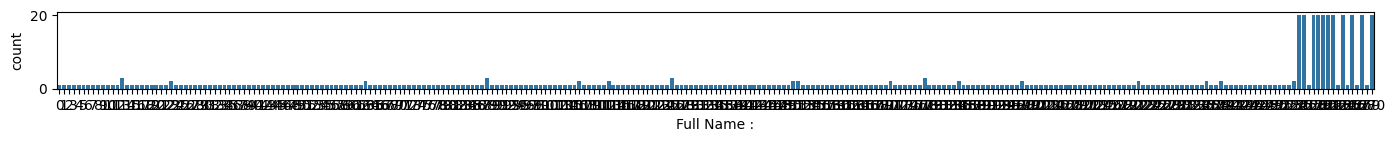

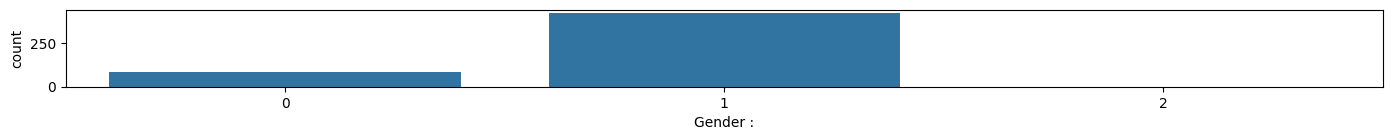

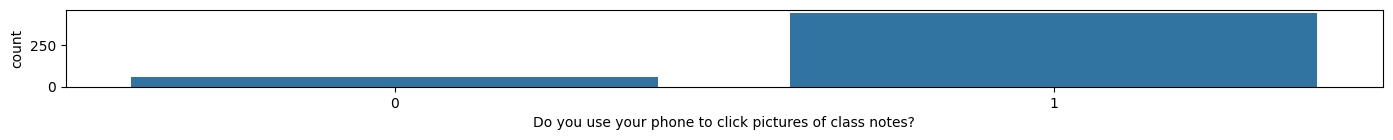

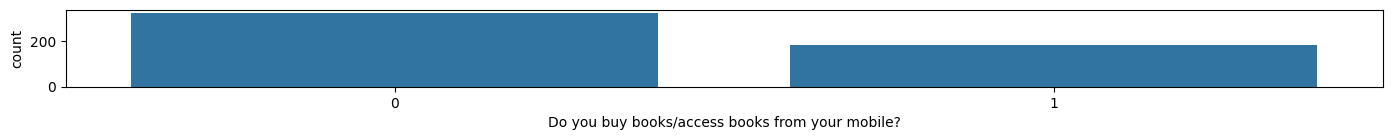

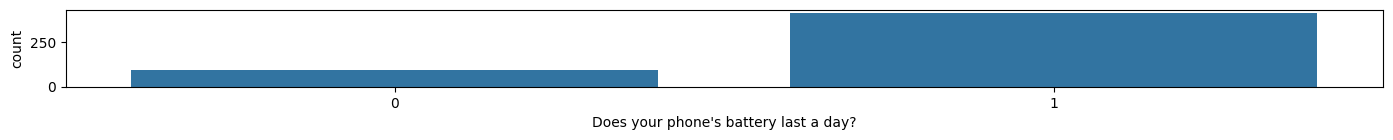

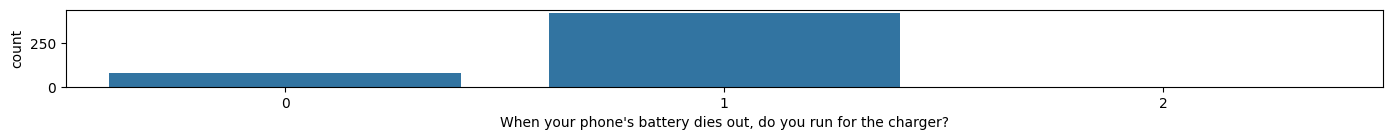

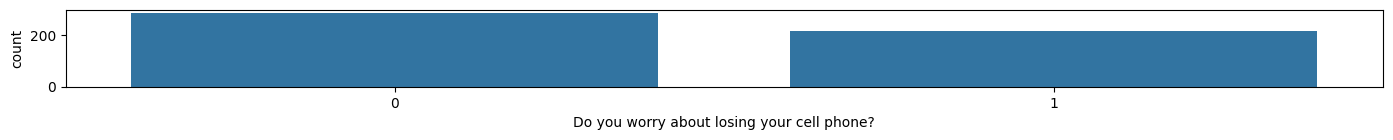

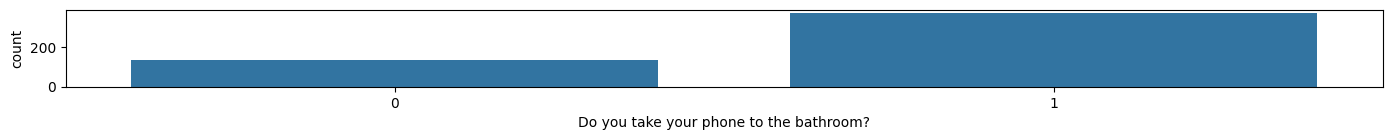

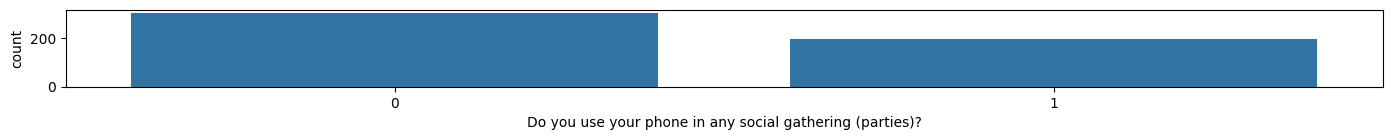

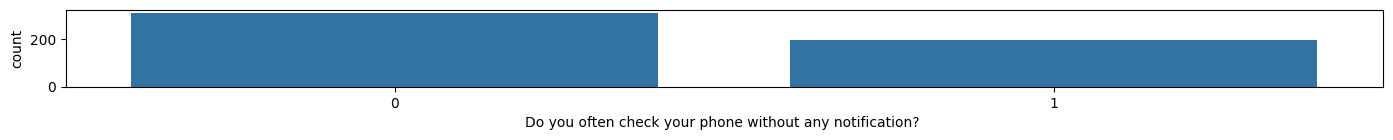

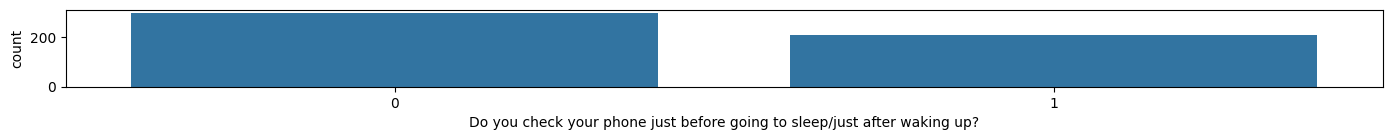

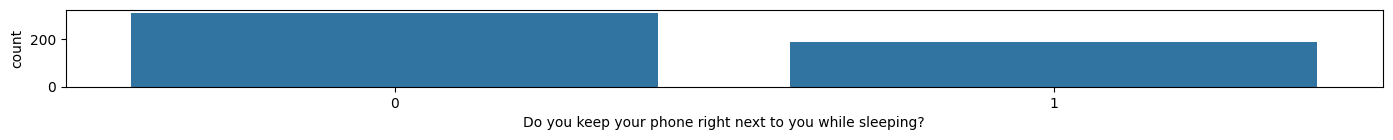

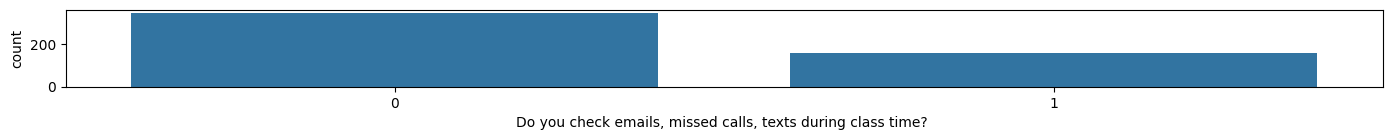

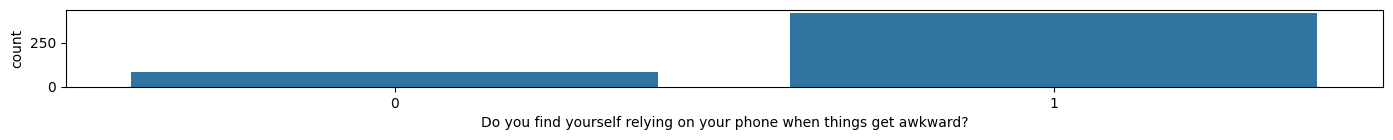

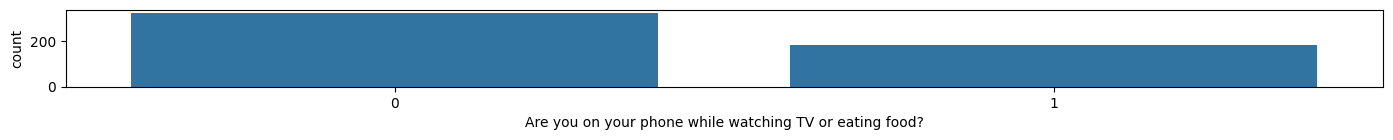

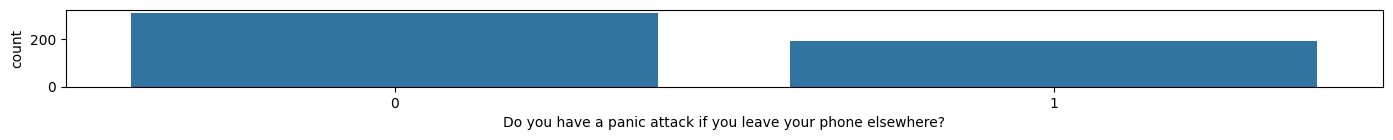

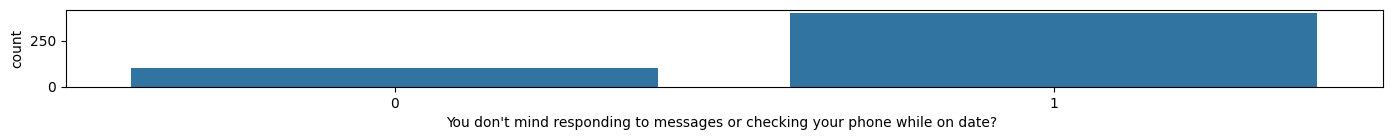

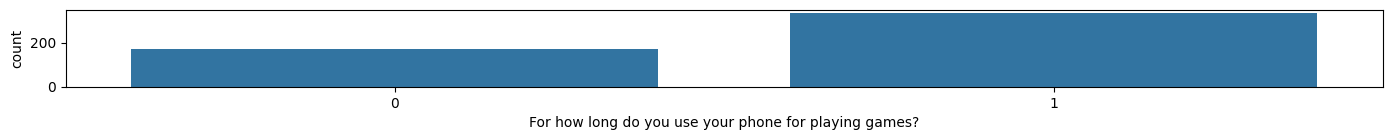

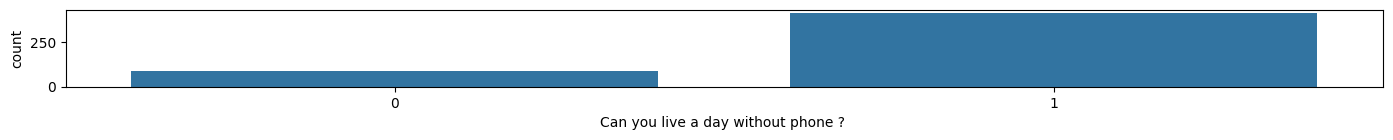

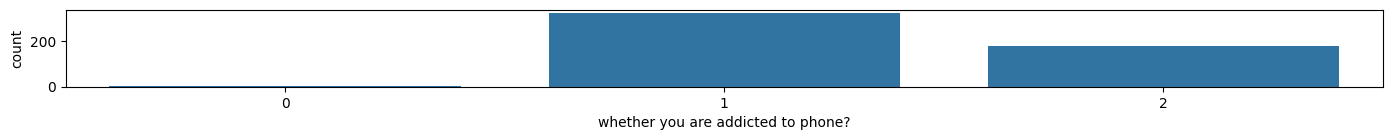

In [28]:
# countplot of every column in dataset
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.countplot(data=df1, x=column)
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 21 columns):
 #   Column                                                                        Non-Null Count  Dtype
---  ------                                                                        --------------  -----
 0   Timestamp                                                                     501 non-null    int32
 1   Full Name :                                                                   501 non-null    int32
 2   Gender :                                                                      501 non-null    int32
 3   Do you use your phone to click pictures of class notes?                       501 non-null    int32
 4   Do you buy books/access books from your mobile?                               501 non-null    int32
 5   Does your phone's battery last a day?                                         501 non-null    int32
 6   When your phone's battery dies out, do you run for

<Axes: ylabel='whether you are addicted to phone?'>

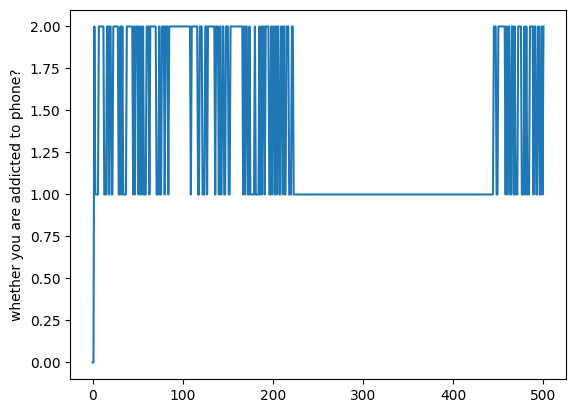

In [30]:
# Target column lineplot
sns.lineplot(df["whether you are addicted to phone?"])

<Axes: xlabel='whether you are addicted to phone?', ylabel='Count'>

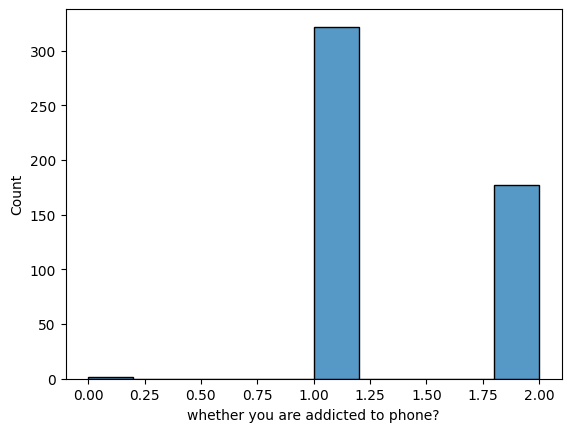

In [31]:
# Target column lineplot
sns.histplot(df["whether you are addicted to phone?"])

<Axes: xlabel='whether you are addicted to phone?', ylabel='Density'>

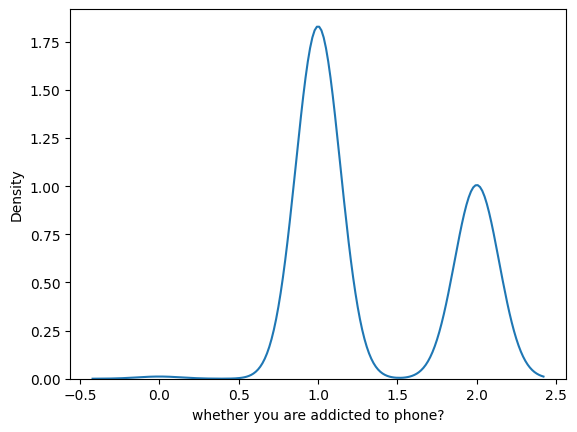

In [32]:
# target column kdeplot
sns.kdeplot(df["whether you are addicted to phone?"])

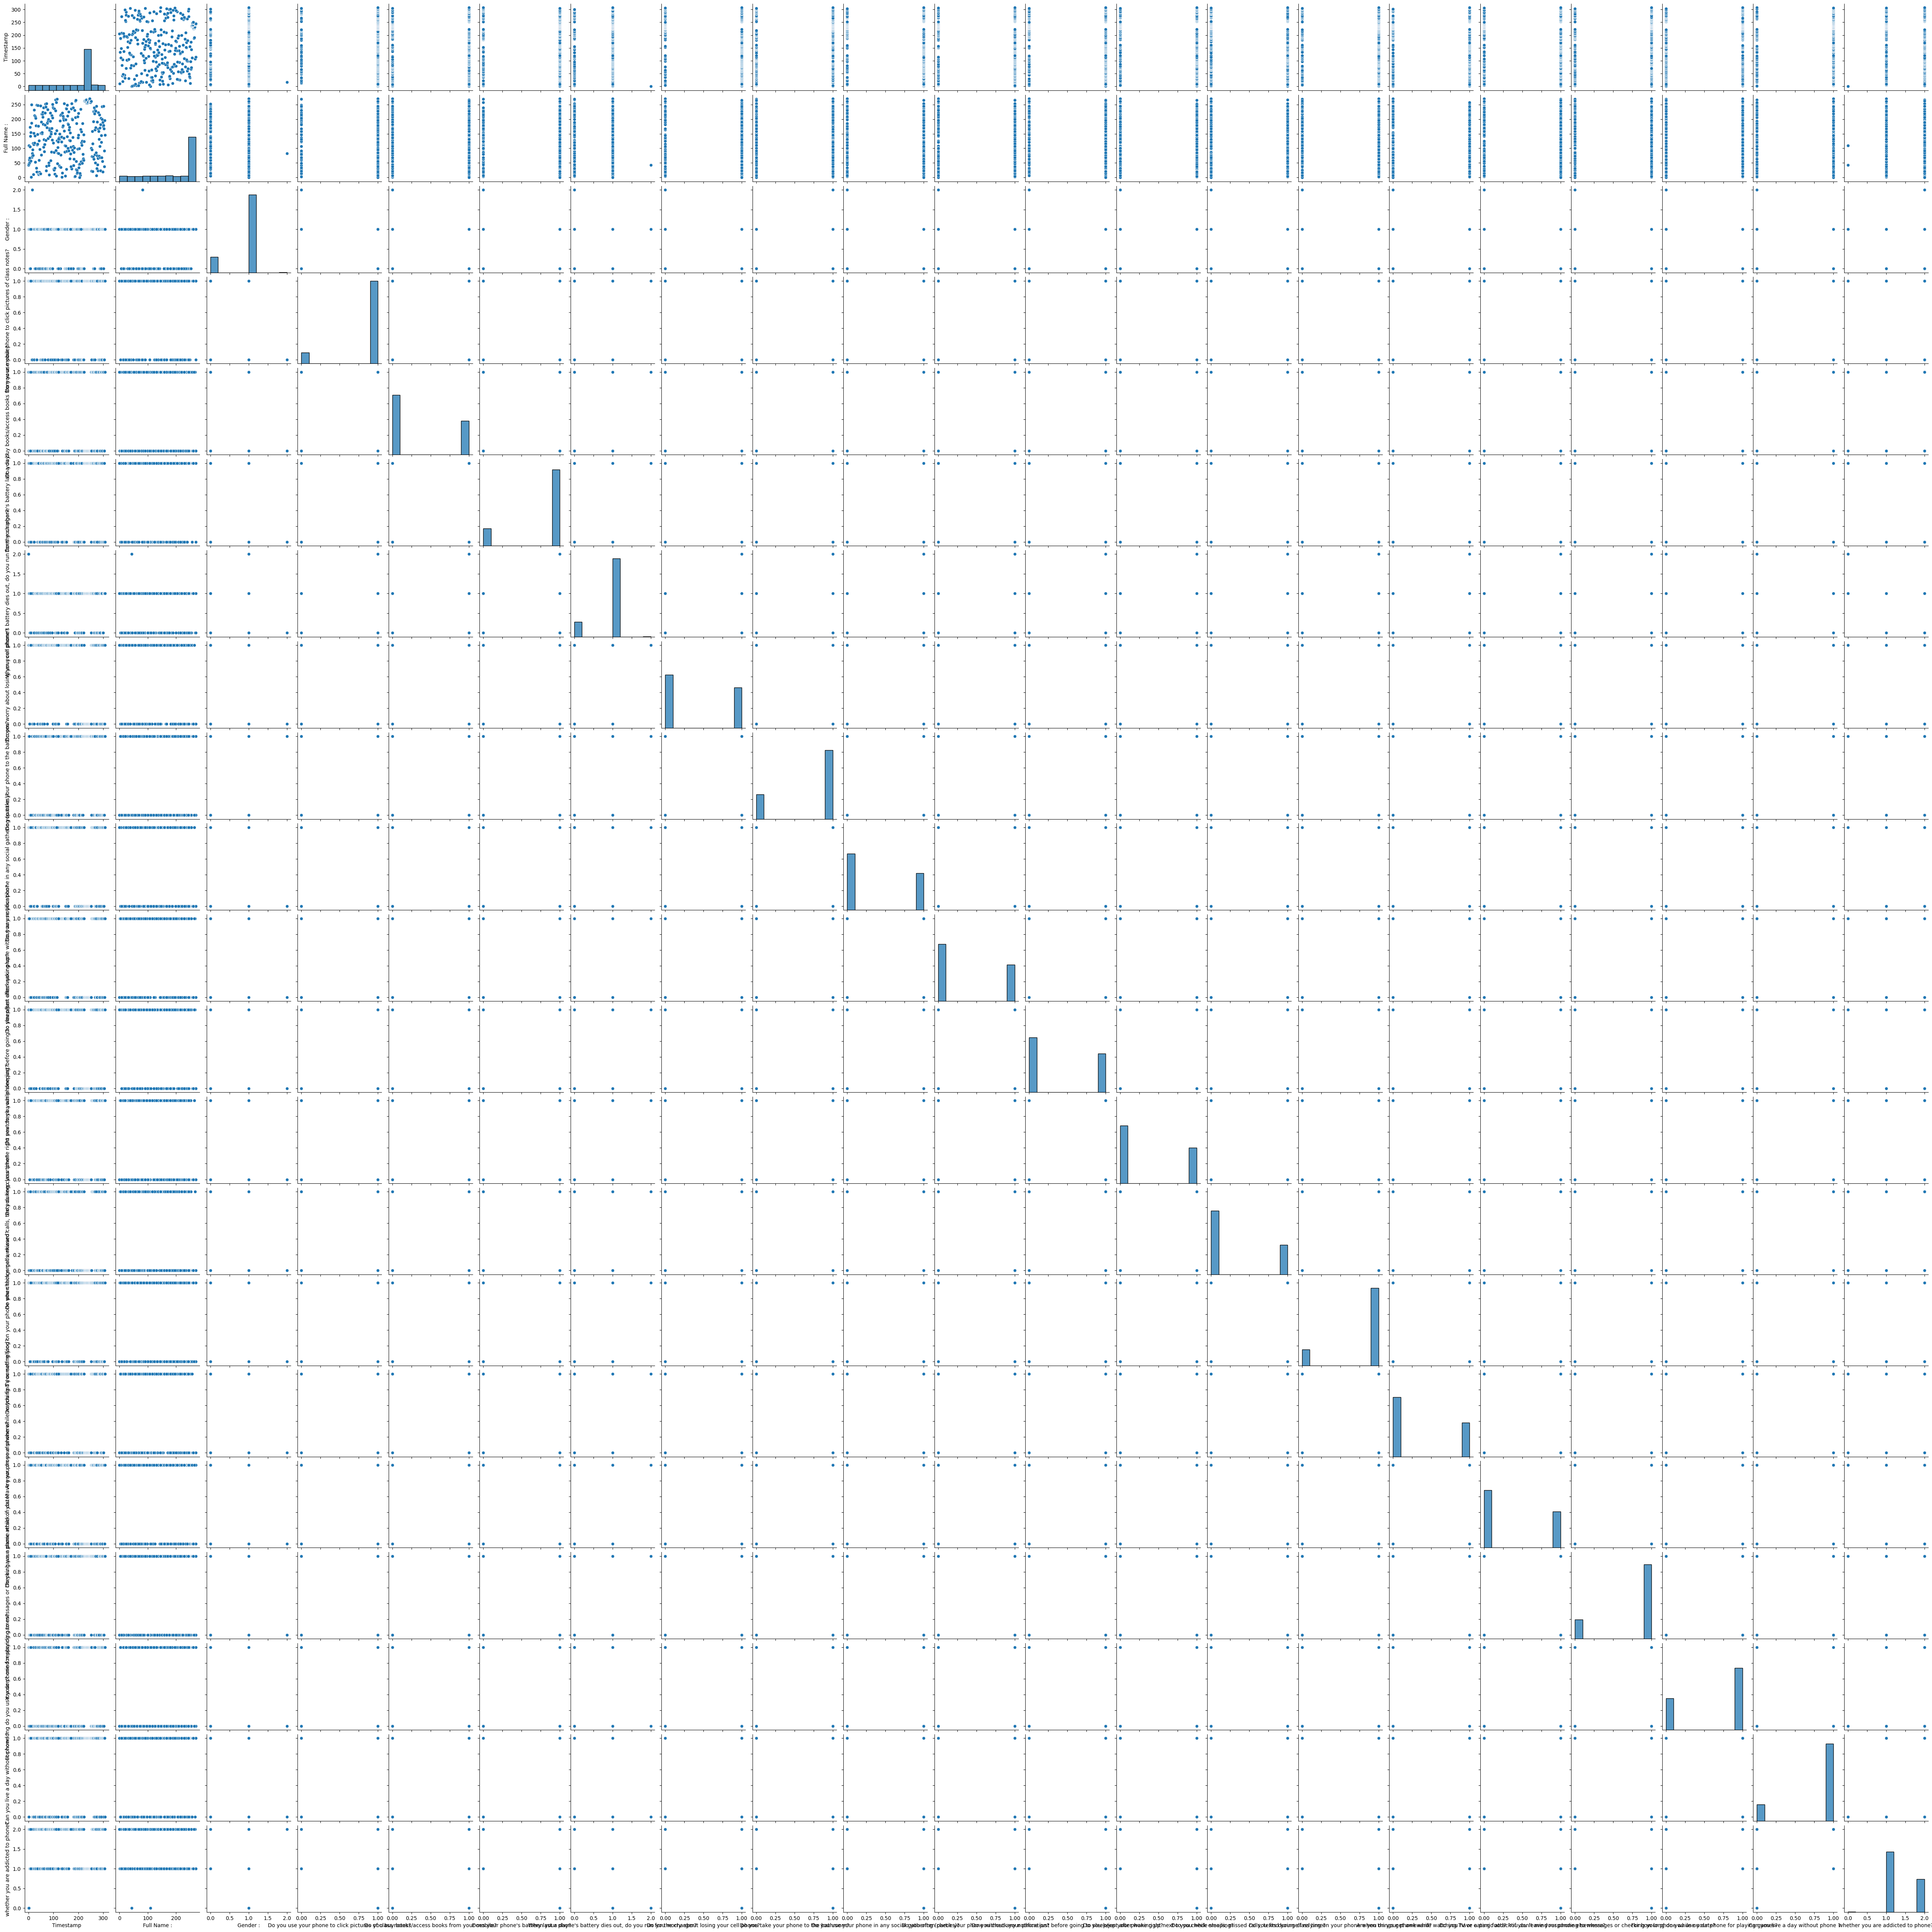

In [33]:
# pairplot of every column in dataset
sns.pairplot(df)

# **Split The Data**

In [34]:
# Delete The unknown column
df.drop('Timestamp', axis = 1,inplace = True)

In [35]:

x = df.drop(['whether you are addicted to phone?'], axis = 1) 
y = df['whether you are addicted to phone?']

In [36]:
Oversample = RandomOverSampler(random_state=72)
x_sm, y_sm = Oversample.fit_resample(x[:100],y[:100])

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size = 0.3, random_state= 72)

In [38]:
x_train.shape

(136, 19)

In [39]:
x_test.shape

(59, 19)

In [40]:
y_train.shape

(136,)

In [41]:
y_test.shape

(59,)

# **Module Train**

## **RendomForestClasifier**

In [42]:
from sklearn.ensemble import RandomForestClassifier
re = RandomForestClassifier(random_state=72)
re.fit(x_train,y_train)
re_pred = re.predict(x_test)
ac = accuracy_score(y_test,re_pred)
ac

0.7796610169491526

## **DecisionTreeClasifier**

In [43]:
from sklearn.tree import DecisionTreeClassifier
de = DecisionTreeClassifier()
de.fit(x_train,y_train)
de_pred = de.predict(x_test)
ac1 = accuracy_score(y_test,de_pred)
ac1

0.7627118644067796

# **Logistic Regration**

In [44]:
from sklearn.linear_model import LogisticRegression
le = LogisticRegression()
le.fit(x_train,y_train)
le_pred = le.predict(x_test)
ac2 = accuracy_score(y_test,le_pred)
ac2

c:\Users\chinm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7457627118644068

# **Accuracy graph**

In [45]:
graph = pd.DataFrame({'Modules':['RendomForestClasifier','DecisionTreeClassifier','Logistic Regration'],
          'Accuracy':[ac*100,ac1*100,ac2*100]})

In [46]:
graph

,Modules,Accuracy
0,RendomForestClasifier,77.966102
1,DecisionTreeClassifier,76.271186
2,Logistic Regration,74.576271


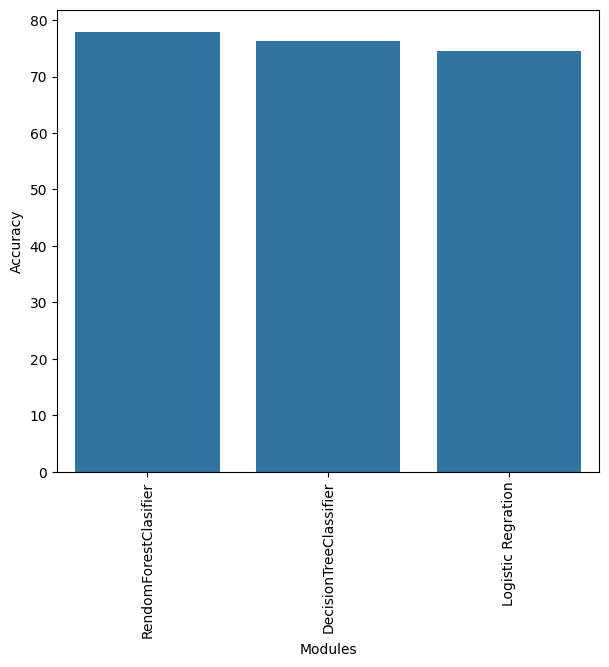

In [47]:
plt.figure(figsize=(7,6))
sns.barplot(y=graph.Accuracy,x=graph.Modules)
plt.xticks(rotation='vertical')
plt.show()